In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset_train = pd.read_csv('G_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
regressor = Sequential()

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [12]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 36s 167ms/step - loss: 0.1160
Epoch 2/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0047
Epoch 4/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0051
Epoch 5/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0047
Epoch 6/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 117ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 5s 127ms/step - loss: 0.0054
Epoch 12/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0038
Epoch 13/100

38/38 [==============================] - 5s 132ms/step - loss: 0.0014
Epoch 100/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0013


In [13]:
dataset_test = pd.read_csv('G_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [14]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

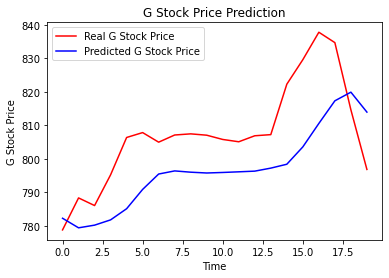

In [15]:
plt.plot(real_stock_price, color = 'red', label = 'Real G Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted G Stock Price')
plt.title('G Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('G Stock Price')
plt.legend()
plt.show()

In [16]:
predicted_stock_price

array([[782.2906 ],
       [779.4357 ],
       [780.234  ],
       [781.8079 ],
       [785.13745],
       [790.90015],
       [795.4912 ],
       [796.4212 ],
       [796.0414 ],
       [795.79926],
       [795.9572 ],
       [796.1505 ],
       [796.35345],
       [797.25507],
       [798.41174],
       [803.5906 ],
       [810.5846 ],
       [817.34375],
       [819.9245 ],
       [813.9728 ]], dtype=float32)